In [1]:
from coin2dic import coin2dic
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import numpy as np
import similaritymeasures

In [2]:
LAST_YEARS_DIR = './Crypto_19-20' 
coins = pd.DataFrame()
for csv_file in os.listdir(LAST_YEARS_DIR):
    file_name = os.path.join(LAST_YEARS_DIR, csv_file)
    coin_dict = coin2dic(file_name)
    coins = coins.append(coin_dict, ignore_index=True)
coins = coins.set_index('Name')
coins.head()

market_cap  \
Name                                                               
Kyber Network  [23177641.0, 17634388.0, 21347773.0, 20632706....   
XRP            [15028369642.0, 13045216854.0, 13181215054.0, ...   
Stellar        [2306881891.0, 1981659222.0, 2002863078.0, 184...   
Tether         [1910347641.0, 1967105373.0, 2050721693.0, 203...   
aelf           [35560648.0, 27831782.0, 30215498.0, 29471180....   

                                                normalized_price  \
Name                                                               
Kyber Network  [0.09191276595744681, 0.06993085106382979, 0.0...   
XRP            [0.5943283143852313, 0.5128054968048773, 0.518...   
Stellar        [0.6198204135431254, 0.5334510668094571, 0.539...   
Tether         [1.0, 1.0, 1.0, 0.9901960784313726, 0.98039215...   
aelf           [0.5246585641932365, 0.4106276800542001, 0.445...   

                                                           price  \
Name                                                               
Kyber Network  [0.172796, 0.13147, 0.136816, 0.132233, 0.1169...   
XRP            [0.368395, 0.317863, 0.321177, 0.309439, 0.302...   
Stellar        [0.120384, 0.103609, 0.104702, 0.096316, 0.081...   
Tether         [1.02, 1.02, 1.02, 1.01, 1.0, 1.0, 1.0, 1.01, ...   
aelf           [0.127002, 0.099399, 0.107912, 0.105254, 0.098...   

                                                          volume  \
Name                                                               
Kyber Network  [3041633.0, 2404111.0, 3733933.0, 2385264.0, 1...   
XRP            [492558794.0, 452358902.0, 407205881.0, 362599...   
Stellar        [93094440.0, 119389904.0, 123424390.0, 1349884...   
Tether         [4224650070.0, 3380321686.0, 4389435191.0, 393...   
aelf           [4491096.0, 2613764.0, 3744827.0, 2588166.0, 1...   

                                                            year  
Name                                                              
Kyber Network  [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....  
XRP            [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....  
Stellar        [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....  
Tether         [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....  
aelf           [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....

In [3]:
def moving_avg(x, n):
    if n ==0:
        return x
    else:
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
def distances(coin, bitcoin):
    x = range(len(bitcoin))
    num_data = np.zeros((len(x),2))
    num_data[:, 0] = x
    num_data[:, 1] = bitcoin
    exp_data = np.zeros((len(x), 2))
    exp_data[:, 0] = x
    exp_data[:, 1] = coin
    pcm = round(similaritymeasures.pcm(exp_data,num_data),2)
    df = round(similaritymeasures.frechet_dist(exp_data,num_data),2)
    area = round(similaritymeasures.area_between_two_curves(exp_data,num_data),2)
    cl = round(similaritymeasures.curve_length_measure(exp_data,num_data),2)
    dtw, d = similaritymeasures.dtw(exp_data,num_data)
    dtw = round(dtw,2)
    correlation = signal.correlate(bitcoin, coin)
    correlation = float(max(correlation))
    return pcm, df, area, cl ,dtw, correlation

### Se utilizarán algunas métricas para buscar las monedas con comportamiento más similar al BTC

In [4]:
def get_distances(coins,n_average):
    bitcoin = coins.loc['Bitcoin']['normalized_price']
    
    bitcoin = moving_avg(bitcoin, n_average)
    partial_curve_mapping = []
    fretchet = []
    area_between_curves = []
    curve_lenght = []
    dynamic_time_warping = []
    correlation = []
    for index, row in coins.iterrows():
        price = coins.loc[index]['normalized_price']
        
        price = moving_avg(price,n_average)
        pcm, df, area, cl, dtw, corr = distances(price,bitcoin)
        partial_curve_mapping.append(pcm)
        fretchet.append(df)
        area_between_curves.append(area)
        curve_lenght.append(cl)
        dynamic_time_warping.append(dtw)
        correlation.append(corr)
    return partial_curve_mapping, fretchet, area_between_curves, curve_lenght, dynamic_time_warping, correlation




### Primero se elimina de las listas con las métricas el valor que corresponde a comparar BTC con BTC


In [5]:

partial_curve_mapping, fretchet, area_between_curves, curve_lenght, dynamic_time_warping, correlation = get_distances(coins,4)
indexes = coins.index.tolist()
btc_index = indexes.index('Bitcoin')

correlation[btc_index] = np.nan
curve_lenght[btc_index] = np.nan
dynamic_time_warping[btc_index] = np.nan
fretchet[btc_index] = np.nan
partial_curve_mapping[btc_index] = np.nan
area_between_curves[btc_index] = np.nan

coins['correlation'] = correlation
coins['curve_lenght'] = curve_lenght
coins['fretchet'] = fretchet
coins['partial_curve_mapping'] = partial_curve_mapping
coins['area_between_curves'] = area_between_curves


In [6]:
coins.head()

market_cap  \
Name                                                               
Kyber Network  [23177641.0, 17634388.0, 21347773.0, 20632706....   
XRP            [15028369642.0, 13045216854.0, 13181215054.0, ...   
Stellar        [2306881891.0, 1981659222.0, 2002863078.0, 184...   
Tether         [1910347641.0, 1967105373.0, 2050721693.0, 203...   
aelf           [35560648.0, 27831782.0, 30215498.0, 29471180....   

                                                normalized_price  \
Name                                                               
Kyber Network  [0.09191276595744681, 0.06993085106382979, 0.0...   
XRP            [0.5943283143852313, 0.5128054968048773, 0.518...   
Stellar        [0.6198204135431254, 0.5334510668094571, 0.539...   
Tether         [1.0, 1.0, 1.0, 0.9901960784313726, 0.98039215...   
aelf           [0.5246585641932365, 0.4106276800542001, 0.445...   

                                                           price  \
Name                                                               
Kyber Network  [0.172796, 0.13147, 0.136816, 0.132233, 0.1169...   
XRP            [0.368395, 0.317863, 0.321177, 0.309439, 0.302...   
Stellar        [0.120384, 0.103609, 0.104702, 0.096316, 0.081...   
Tether         [1.02, 1.02, 1.02, 1.01, 1.0, 1.0, 1.0, 1.01, ...   
aelf           [0.127002, 0.099399, 0.107912, 0.105254, 0.098...   

                                                          volume  \
Name                                                               
Kyber Network  [3041633.0, 2404111.0, 3733933.0, 2385264.0, 1...   
XRP            [492558794.0, 452358902.0, 407205881.0, 362599...   
Stellar        [93094440.0, 119389904.0, 123424390.0, 1349884...   
Tether         [4224650070.0, 3380321686.0, 4389435191.0, 393...   
aelf           [4491096.0, 2613764.0, 3744827.0, 2588166.0, 1...   

                                                            year  correlation  \
Name                                                                            
Kyber Network  [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....    14.355817   
XRP            [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....    19.595954   
Stellar        [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....    18.511459   
Tether         [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....    43.400632   
aelf           [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....    19.832340   

               curve_lenght  fretchet  partial_curve_mapping  \
Name                                                           
Kyber Network          6.93      0.46                  10.87   
XRP                    2.88      0.34                   8.35   
Stellar                3.19      0.38                  13.07   
Tether                 4.29      0.81                 169.62   
aelf                   5.08      0.56                  23.51   

               area_between_curves  
Name                                
Kyber Network                23.00  
XRP                          13.62  
Stellar                      15.71  
Tether                       51.67  
aelf                         19.94

### ahora se deben analizar las métricas utilizadas y determinar cuales funcionan mejor, para esto se van a graficar las 3 monedas que más coinciden según cada métrica

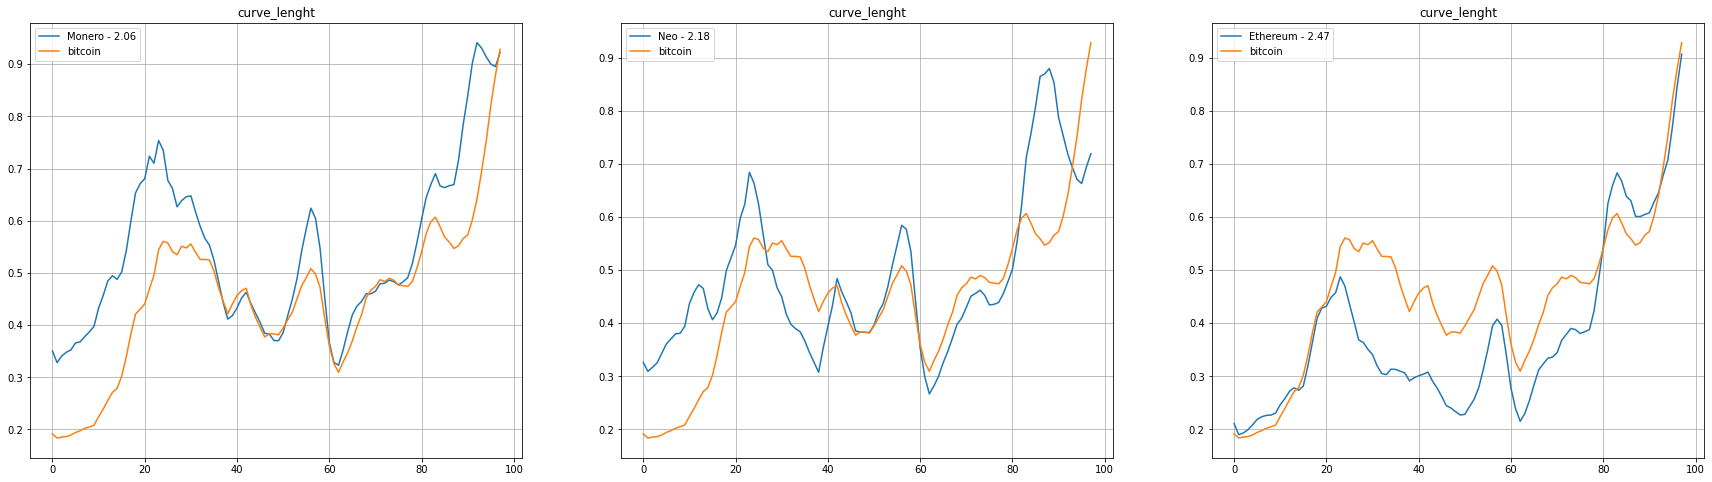

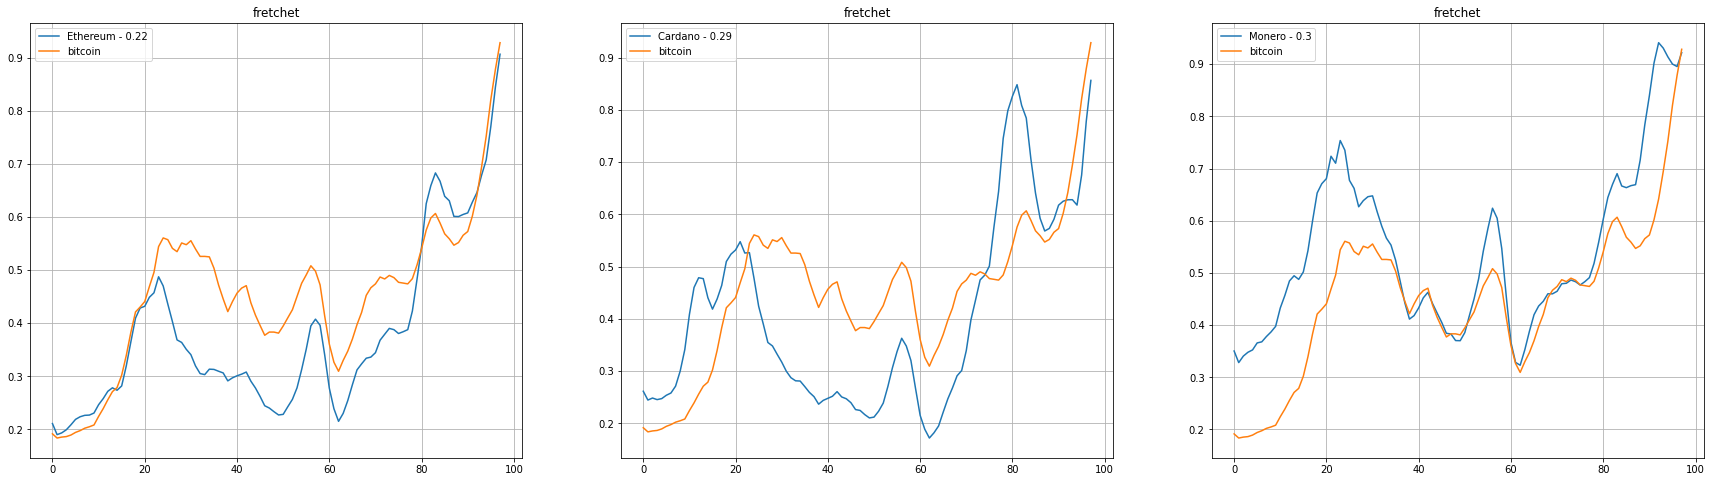

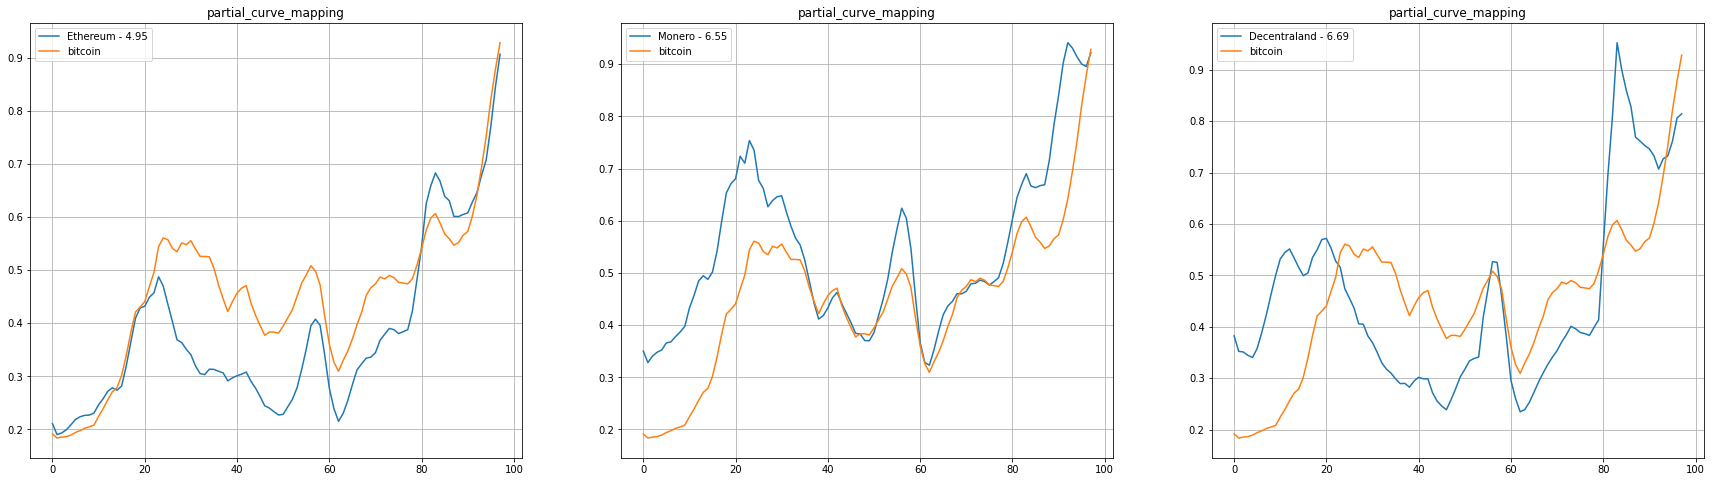

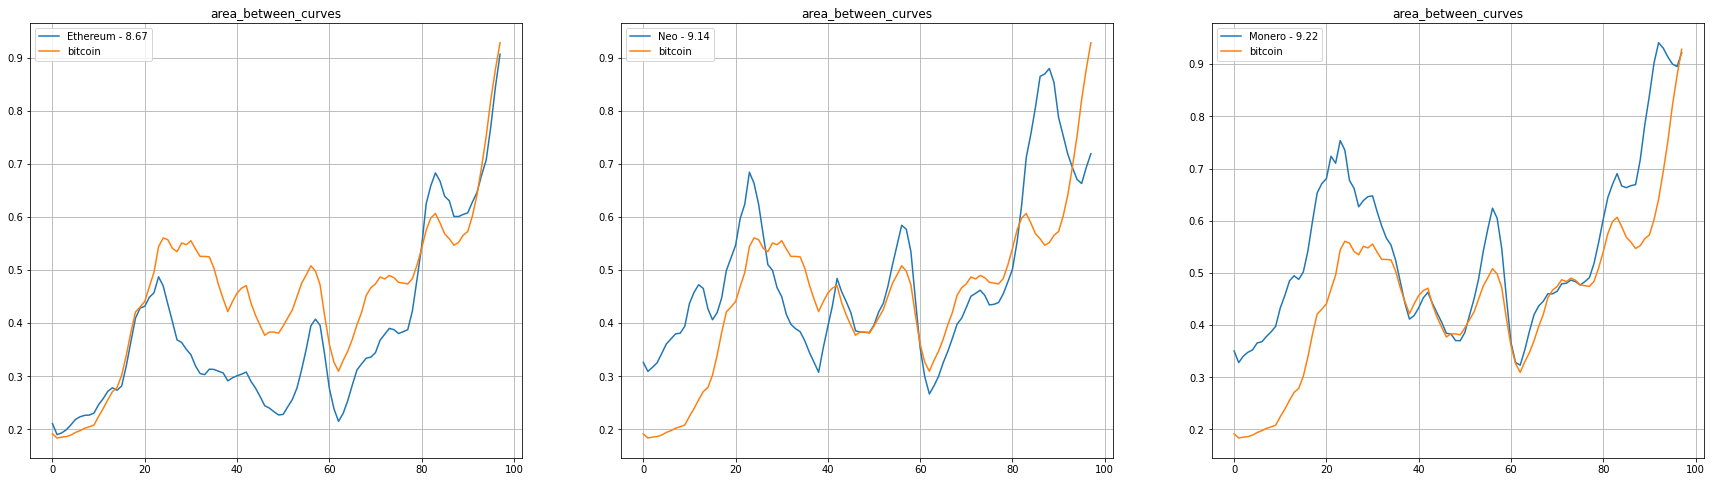

In [7]:
metrics = coins.columns.tolist()[-4:]
bitcoin = moving_avg(coins.loc['Bitcoin']['normalized_price'], 4)
for n, metric in enumerate(metrics):
    values = coins.sort_values(metric).head(3)
    plt.figure(n+1, figsize=(30,8))
    N=1
    for index, row in values.iterrows():
        plt.subplot(130+N)
        N += 1
        price = moving_avg(row['normalized_price'], 4)
        plt.plot(price, label = index + ' - '+str(row[metric]))
        plt.plot(bitcoin, label= 'bitcoin')
        plt.title(metric)
        plt.grid(True)
        plt.legend()

plt.show()




### La métrica que parece que funciona mejor es la distancia de frétchet. Vamos a analizarla con mayor detalle para encontrar un umbral

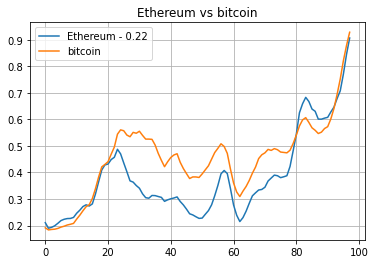

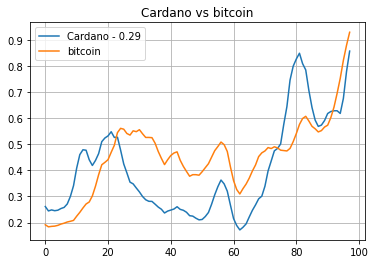

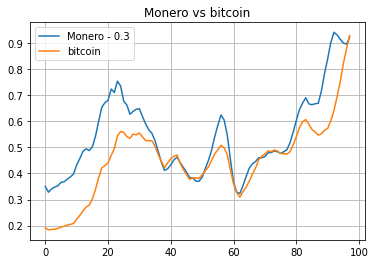

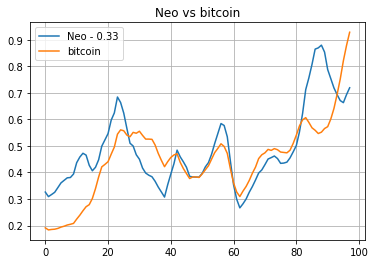

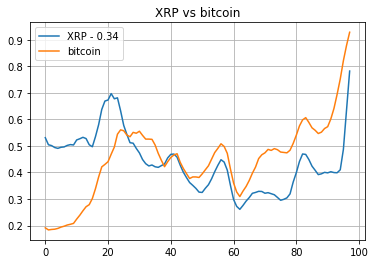

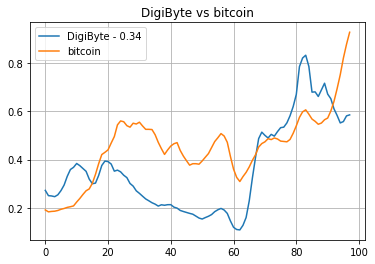

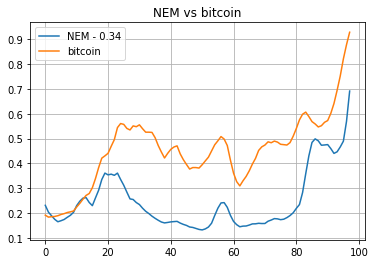

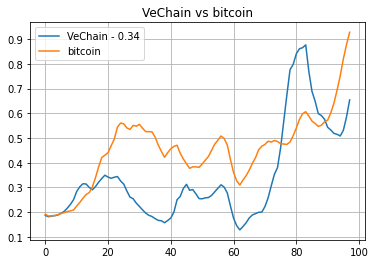

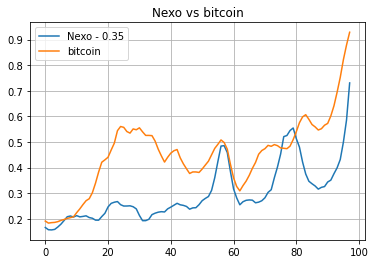

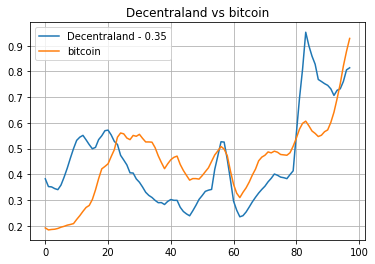

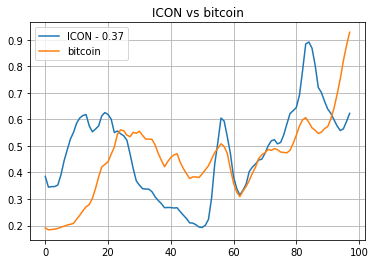

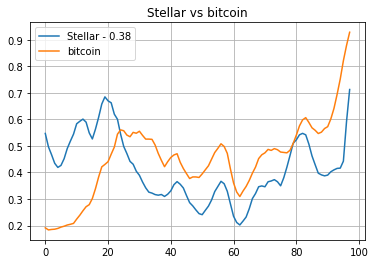

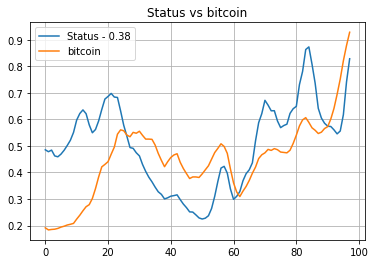

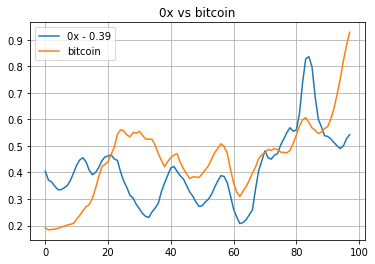

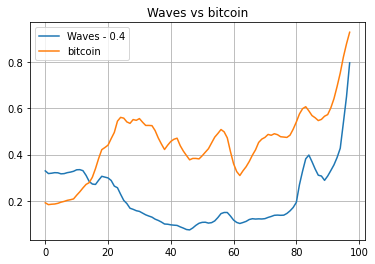

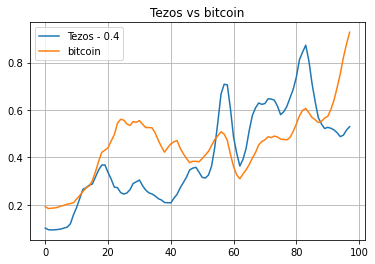

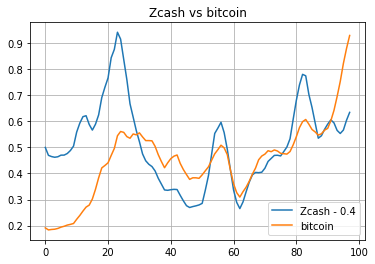

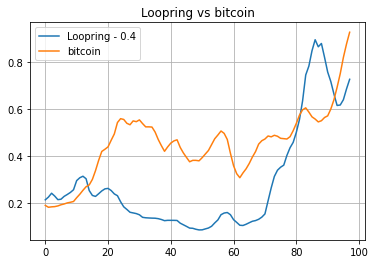

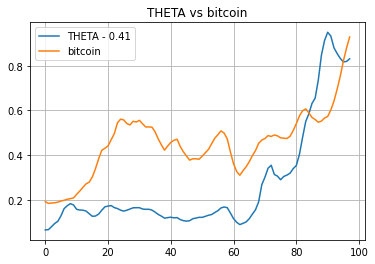

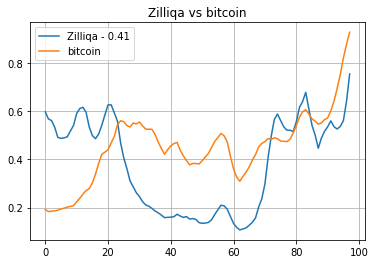

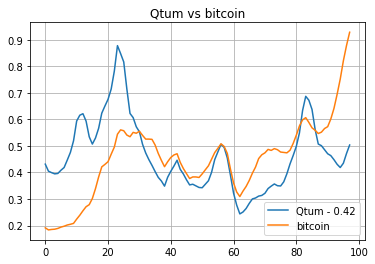

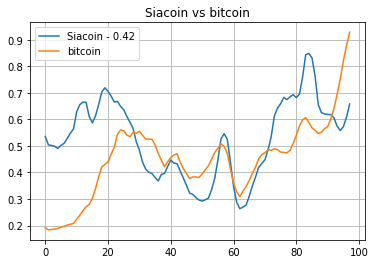

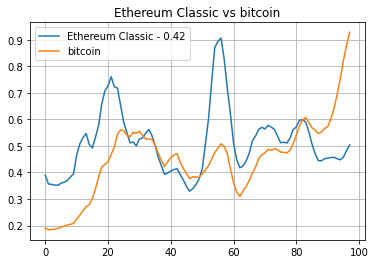

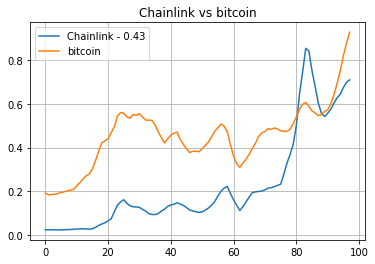

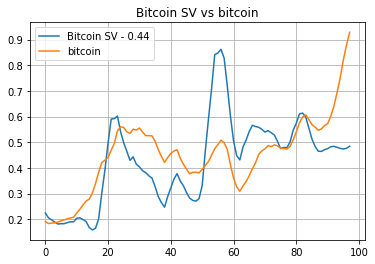

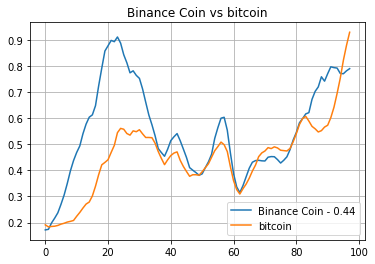

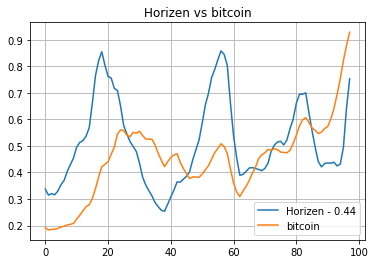

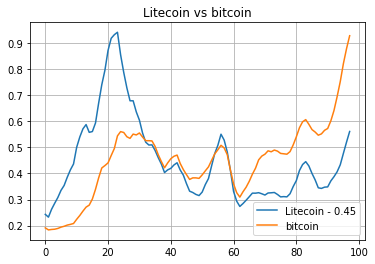

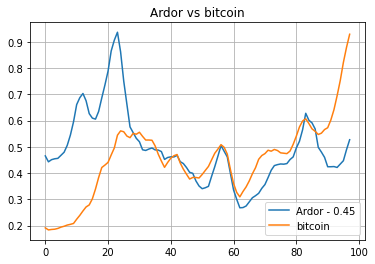

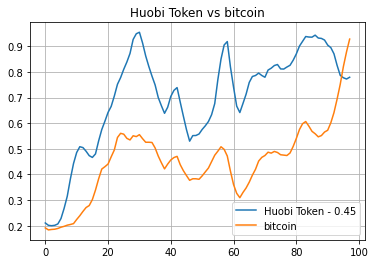

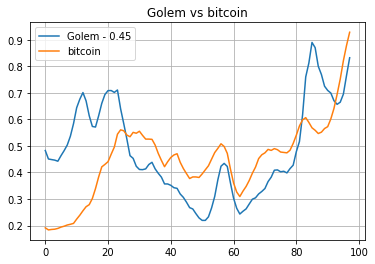

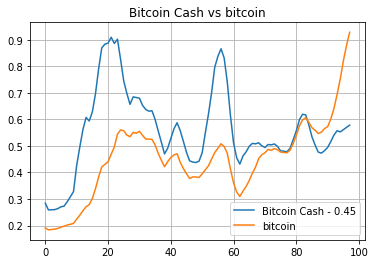

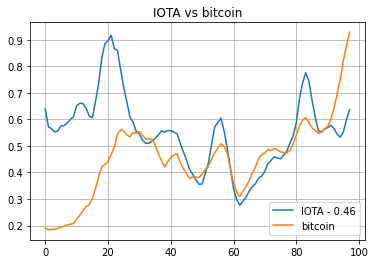

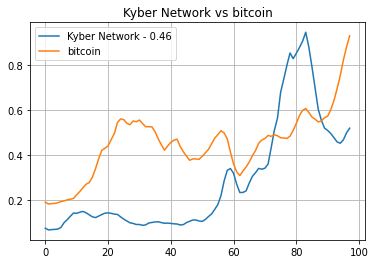

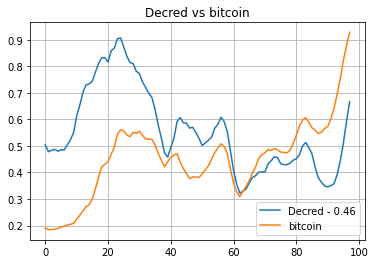

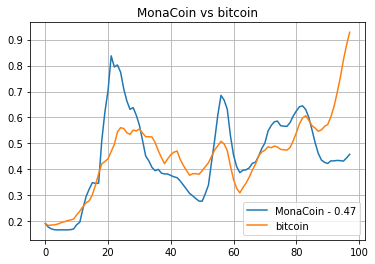

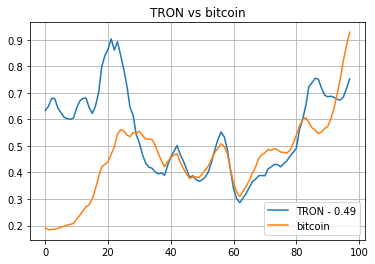

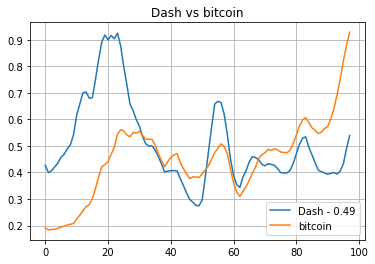

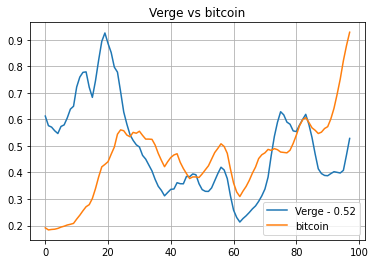

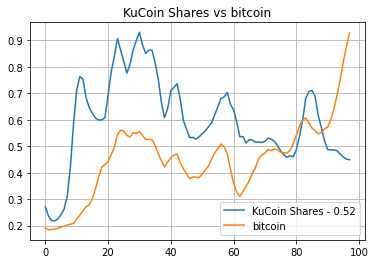

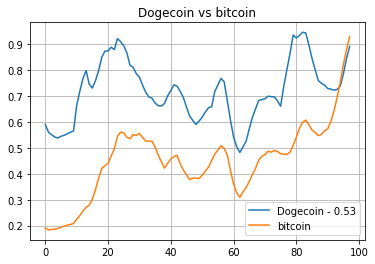

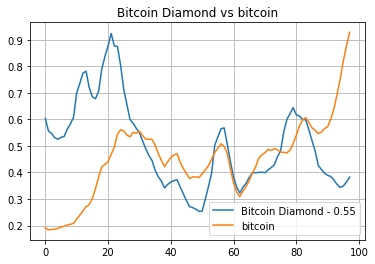

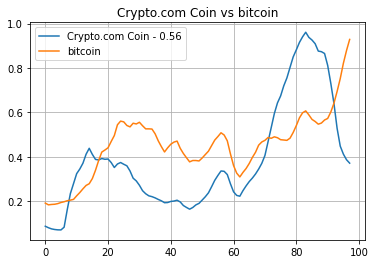

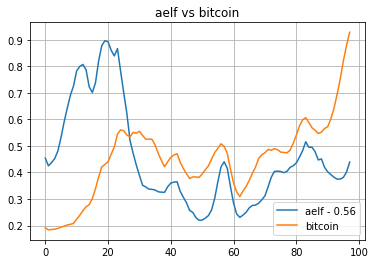

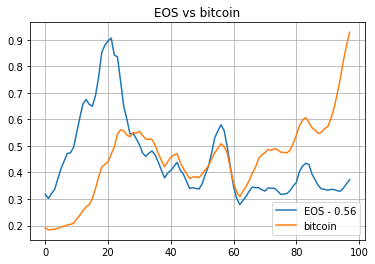

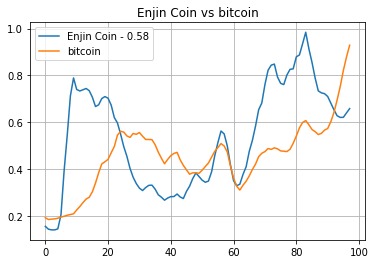

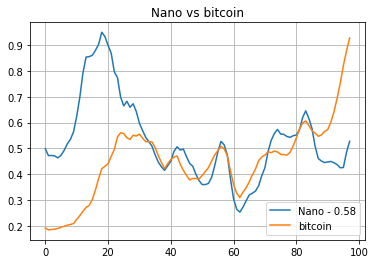

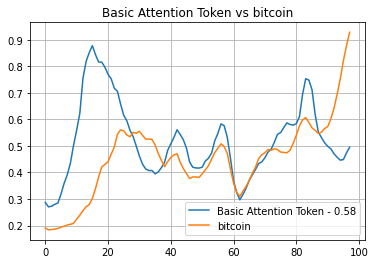

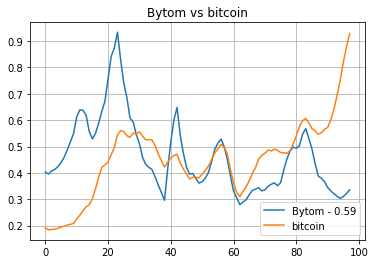

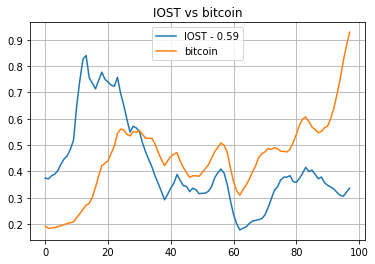

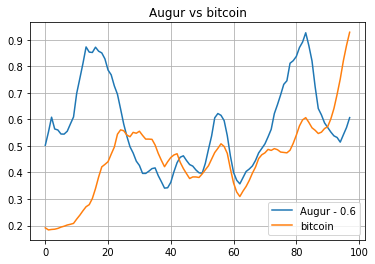

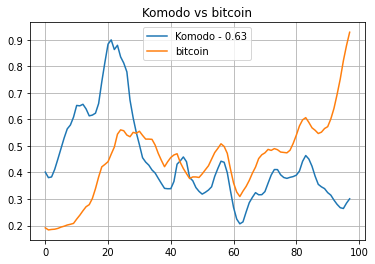

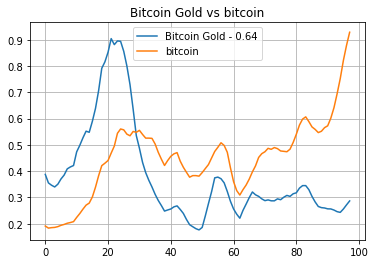

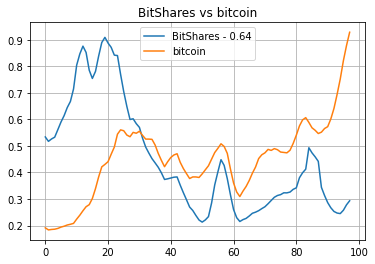

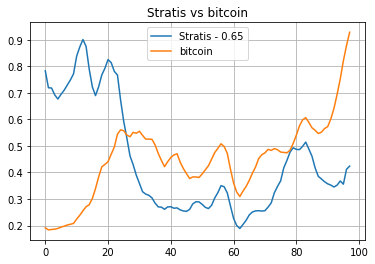

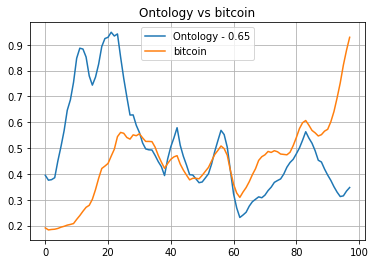

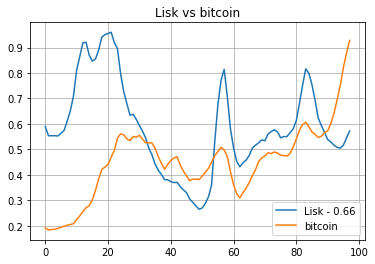

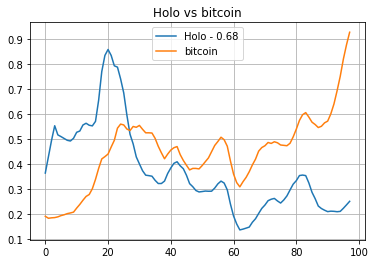

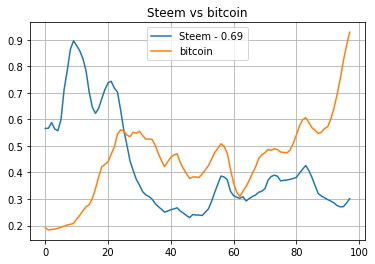

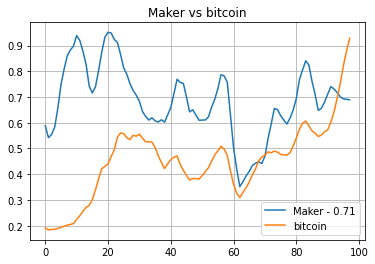

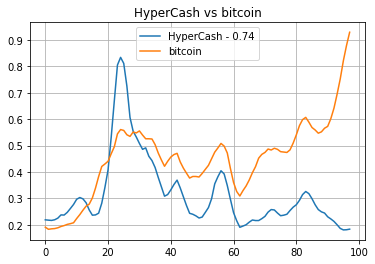

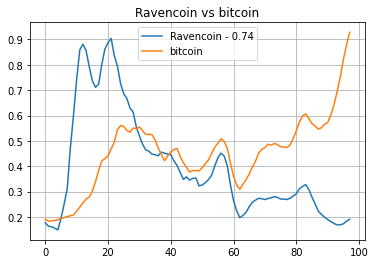

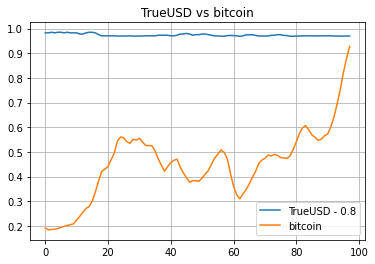

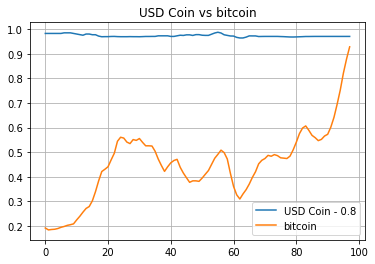

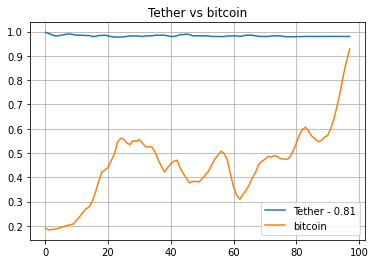

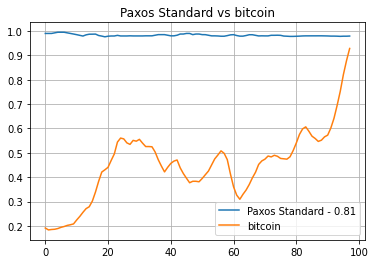

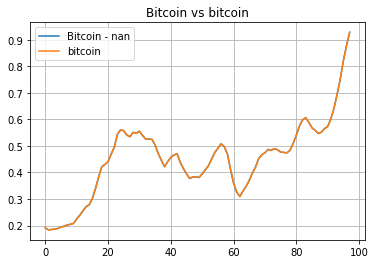

In [8]:
values = coins.sort_values('fretchet')
n=1
for index, row in values.iterrows():
    plt.figure(n)
    n += 1
    price = moving_avg(row['normalized_price'], 4 )
    plt.plot(price, label = index + ' - '+str(row['fretchet']))
    plt.plot(bitcoin, label= 'bitcoin')
    plt.title(f'{index} vs bitcoin')
    plt.grid(True)
    plt.legend()